#Import Libraries

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
from io import BytesIO
from PIL import Image

#Load Image

Saving 1635422078141-removebg-preview.png to 1635422078141-removebg-preview.png


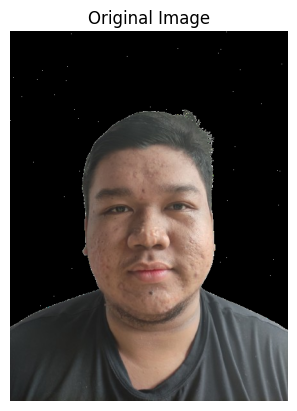

In [6]:
# Function to display an image using matplotlib
def display_image(img, title="Image"):
  plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
  plt.title(title)
  plt.axis('off')
  plt.show()

# Function to display two images side by side
def display_images(img1, img2, title1="Image 1", title2="Image 2"):
  plt.subplot(1, 2, 1)
  plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
  plt.title(title1)
  plt.axis('off')
  plt.subplot(1, 2, 2)
  plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
  plt.title(title2)
  plt.axis('off')
  plt.show()

uploaded = files.upload()
image_path = next(iter(uploaded))
image = Image.open(BytesIO(uploaded[image_path]))
image = cv2.cvtColor(np.array(image), cv2.COLOR_RGB2BGR)

display_image(image, "Original Image")

#Image Transformations

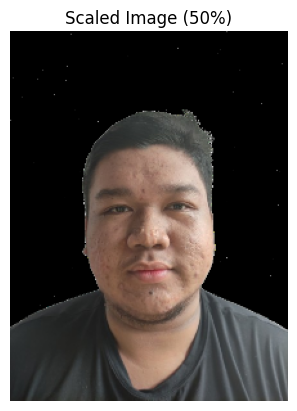

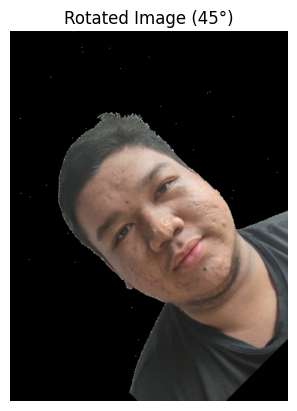

In [7]:
# Scaling
def scale_image(img, scale_factor):
    height, width = img.shape[:2]
    scaled_img = cv2.resize(img,
(int(width * scale_factor), int(height * scale_factor)), interpolation=cv2.INTER_LINEAR)
    return scaled_img

# Rotate
def rotate_image(img, angle):
    height, width = img.shape[:2]
    center = (width // 2, height // 2)
    matrix = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated_img = cv2.warpAffine(img, matrix, (width, height))
    return rotated_img

# Scale image by 0.5
scaled_image = scale_image(image, 0.5)
display_image(scaled_image, "Scaled Image (50%)")

# Rotate image by 45 degrees
rotated_image = rotate_image(image, 45)
display_image(rotated_image, "Rotated Image (45°)")

#Filtering Techniques


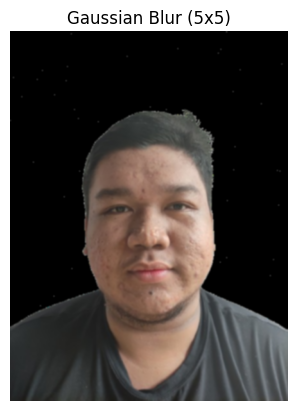

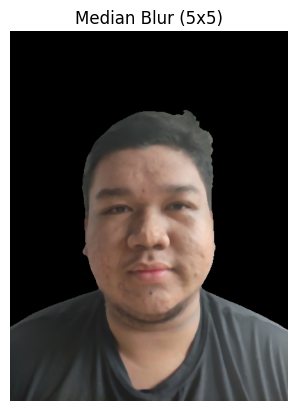

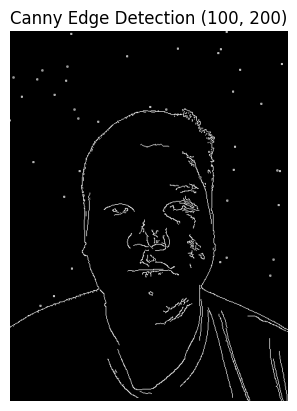

In [8]:
# Gaussian Blur
gaussian_blur = cv2.GaussianBlur(image, (5, 5), 0)
display_image(gaussian_blur, "Gaussian Blur (5x5)")

# Median Blur
median_blur = cv2.medianBlur(image, 5)
display_image(median_blur, "Median Blur (5x5)")

# Canny Edge Detection
edges = cv2.Canny(image, 100, 200)
display_image(edges, "Canny Edge Detection (100, 200)")

#Compile to PDF


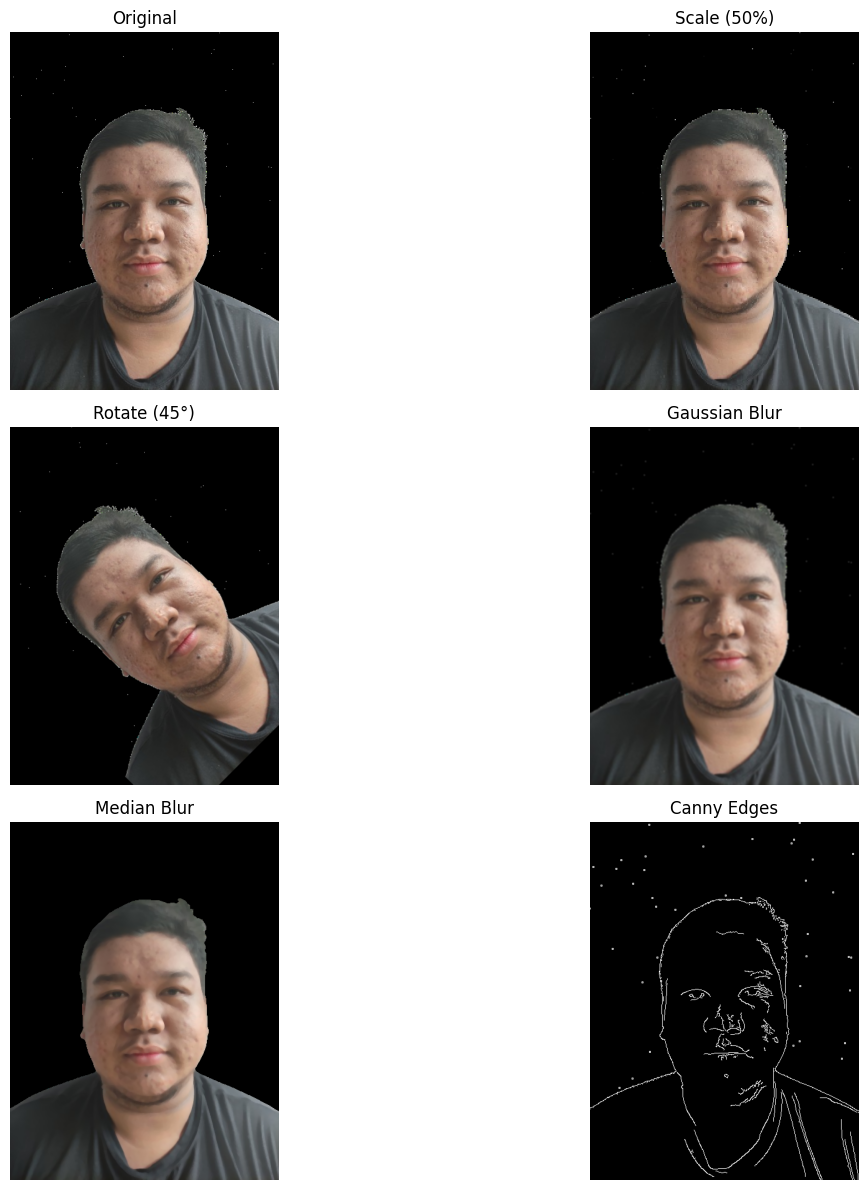

In [9]:
import matplotlib.backends.backend_pdf

# List of actions for processing (without lambda)
actions = [
    ("Original", image),
    ("Scale (50%)", scale_image(image, 0.5)),
    ("Rotate (45°)", rotate_image(image, 45)),
    ("Gaussian Blur", cv2.GaussianBlur(image, (5, 5), 0)),
    ("Median Blur", cv2.medianBlur(image, 5)),
    ("Canny Edges", cv2.Canny(image, 100, 200)),
]

fig = plt.figure(figsize=(15, 12))  # Adjust size as necessary

for i, (title, processed_img) in enumerate(actions):
    plt.subplot(3, 2, i+1)
    if len(processed_img.shape) == 2:
        plt.imshow(processed_img, cmap='gray')
    else:
        plt.imshow(cv2.cvtColor(processed_img, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis('off')

plt.tight_layout()


pdf_filename = "image_processing_results.pdf"
pdf = matplotlib.backends.backend_pdf.PdfPages(pdf_filename)
pdf.savefig(fig)
pdf.close()
plt.show()